In [1]:
!pip install -q datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


# Log in first since the dataset is gated

In [3]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
from datasets import load_dataset

dataset = load_dataset("segments/sidewalk-semantic")

README.md:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/324M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [8]:
dataset

DatasetDict({
    train: Dataset({
        features: ['pixel_values', 'label'],
        num_rows: 1000
    })
})

In [7]:
image = dataset["train"][0]
image

{'pixel_values': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>,
 'label': <PIL.PngImagePlugin.PngImageFile image mode=L size=1920x1080>}

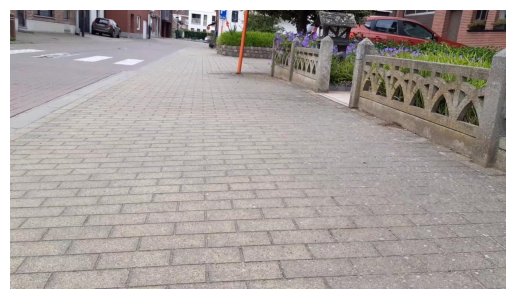

In [19]:
from matplotlib import pyplot as plt
plt.imshow(image["pixel_values"])
plt.axis("off")
plt.show()

In [10]:
from transformers import pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [14]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image['pixel_values'])
results

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=1920x1080>},
 {'score': None,
  'label': 'car

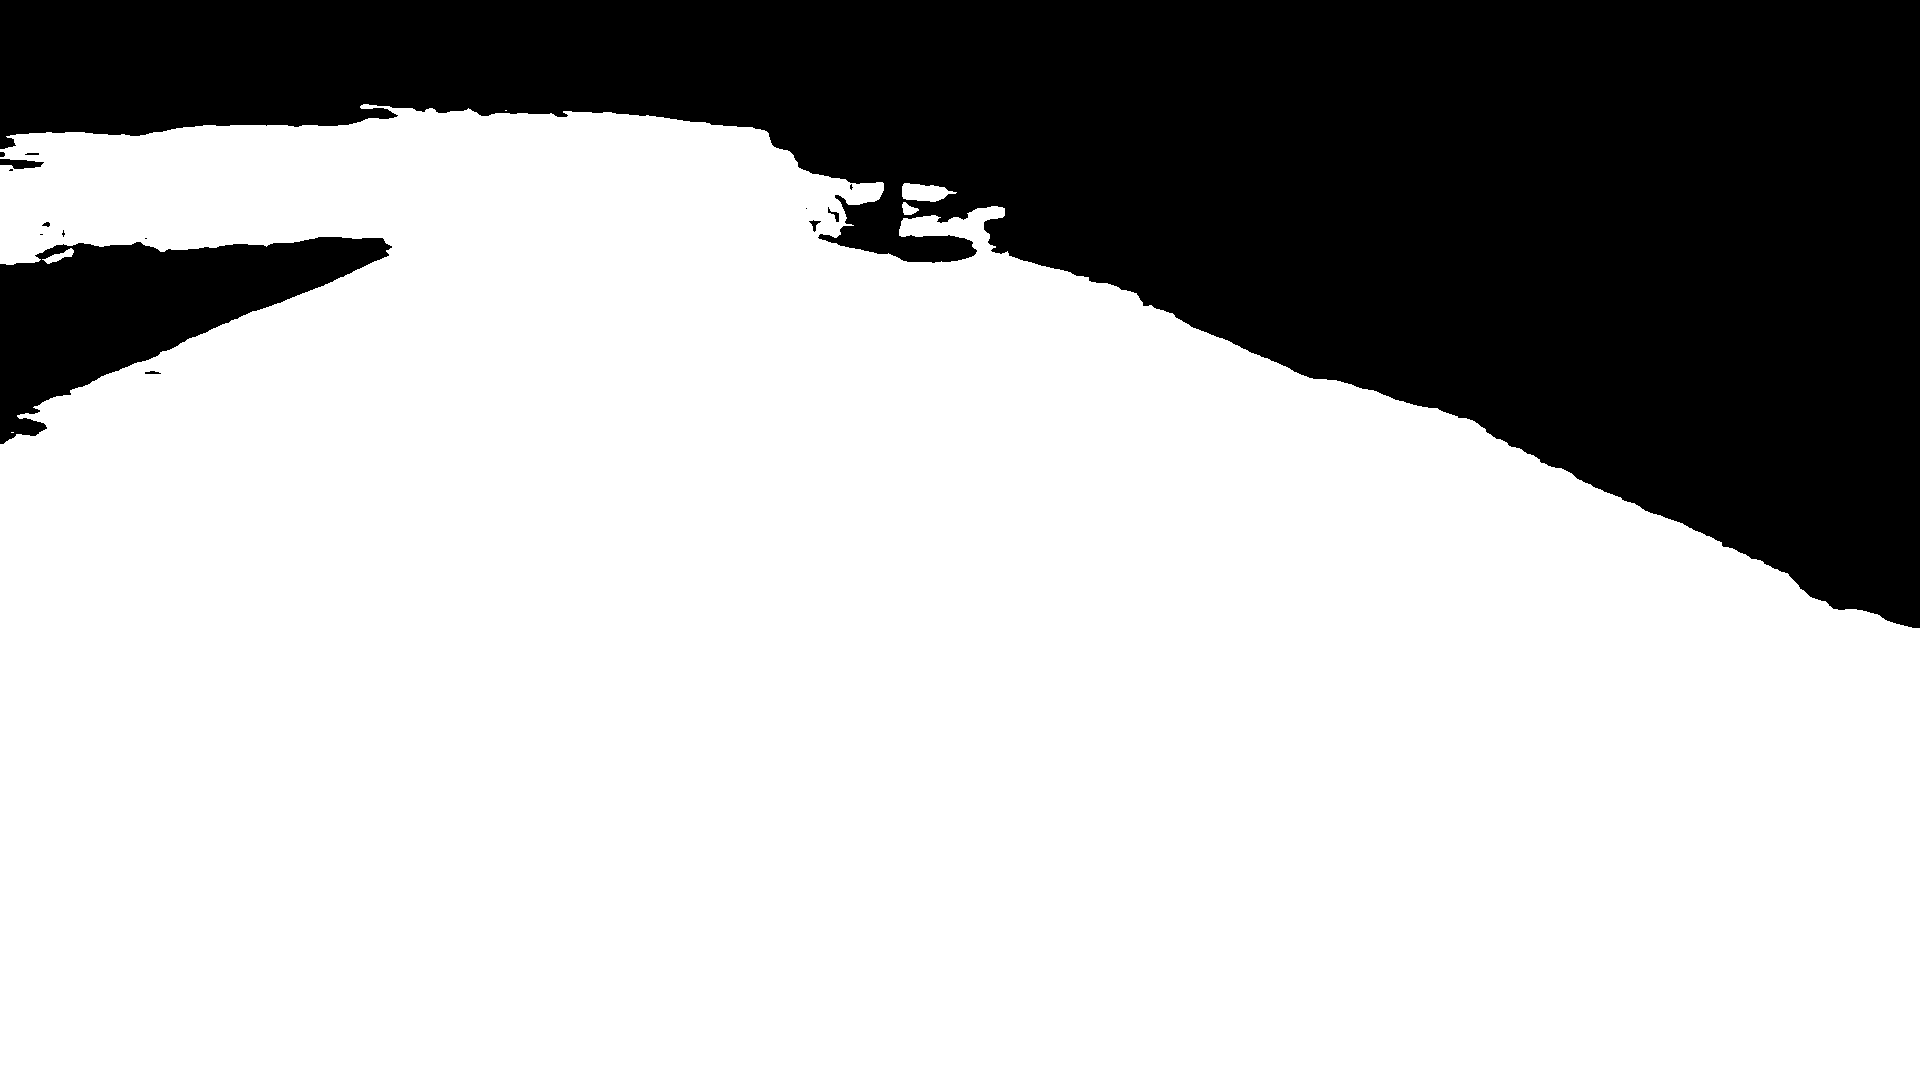

In [17]:
results[0]["mask"]